<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/docs/lectures/ml/analisis_no_supervisado/03_reduccion_dimensionalidad.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Reducción de dimensionalidad

## Introducción
En aprendizaje automático y estadísticas [reducción de dimensionalidad](https://es.wikipedia.org/wiki/Reducci%C3%B3n_de_dimensionalidad)  es el proceso de reducción del número de variables aleatorias que se trate, y se puede dividir en selección de función y extracción de función


Sin embargo, se puede utilizar como un paso de preprocesamiento de transformación de datos para algoritmos de aprendizaje automático en conjuntos de datos de modelado predictivo de clasificación y regresión con algoritmos de aprendizaje supervisado.

Hay muchos algoritmos de reducción de dimensionalidad entre los que elegir y no existe el mejor algoritmo para todos los casos. En cambio, es una buena idea explorar una variedad de algoritmos de reducción de dimensionalidad y diferentes configuraciones para cada algoritmo.



## Algoritmos de reducción de la dimensionalidad
Hay muchos algoritmos que pueden ser usados para la reducción de la dimensionalidad.

Dos clases principales de métodos son los que se extraen del álgebra lineal y los que se extraen del aprendizaje múltiple.

### Métodos de álgebra lineal
Los métodos de factorización matricial extraídos del campo del álgebra lineal pueden utilizarse para la dimensionalidad. Algunos de los métodos más populares incluyen:

* Análisis de los componentes principales
* Descomposición del valor singular
* Factorización de matriz no negativa

### Múltiples métodos de aprendizaje
Los múltiples métodos de aprendizaje buscan una proyección de dimensiones inferiores de alta entrada dimensional que capte las propiedades salientes de los datos de entrada.

Algunos de los métodos más populares incluyen:

* Isomap Embedding
* Locally Linear Embedding
* Multidimensional Scaling
* Spectral Embedding
* t-distributed Stochastic Neighbor Embedding (t-sne)

Cada algoritmo ofrece un enfoque diferente para el desafío de descubrir las relaciones naturales en los datos de dimensiones inferiores.

No hay un mejor algoritmo de reducción de la dimensionalidad, y no hay una manera fácil de encontrar el mejor algoritmo para sus datos sin usar experimentos controlados.

Debido a la importancia que se tiene en el mundo del machine lerning, se dará un explicación formal del método de PCA y luego se dará una breve reseña de los demás métodos.

## PCA 


El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Supóngase que existe una muestra con  $n$  individuos cada uno con  $p$  variables ( $X_1$,...,$X_p$), es decir, el espacio muestral tiene  $p$  dimensiones. PCA permite encontrar un número de factores subyacentes  ($z<p$)  que explican aproximadamente lo mismo que las  $p$  variables originales. Donde antes se necesitaban  $p$  valores para caracterizar a cada individuo, ahora bastan  $z$  valores. Cada una de estas  $z$  nuevas variables recibe el nombre de componente principal.

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/images/pca_01.png" width="600" height="480" align="center"/>


El método de PCA permite por lo tanto "condensar" la información aportada por múltiples variables en solo unas pocas componentes. Aun así, no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes. Dos de las principales aplicaciones del PCA son la visualización y el preprocesado de predictores previo ajuste de modelos supervisados.

### Interpretación geométrica de las componentes principales

Una forma intuitiva de entender el proceso de PCA es interpretar las componentes principales desde un punto de vista geométrico. Supóngase un conjunto de observaciones para las que se dispone de dos variables ( $X_1$, $X_2$ ). El vector que define la primera componente principal ($Z_1$ ) sigue la dirección en la que las observaciones tienen más varianza (línea roja). La proyección de cada observación sobre esa dirección equivale al valor de la primera componente para dicha observación (principal component score,  $z_{i1}$ ).

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/images/pca_02.png" width="600" height="480" align="center"/>

La segunda componente ( $Z_2$ ) sigue la segunda dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente. La condición de no correlación entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.


<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/images/pca_03.png" width="600" height="480" align="center"/>


### Cálculo de las componentes principales


Cada componente principal ( $Z_i$ ) se obtiene por combinación lineal de las variables originales. Se pueden entender como nuevas variables obtenidas al combinar de una determinada forma las variables originales. La primera componente principal de un grupo de variables ( $X_1,...,X_p$ ) es la combinación lineal normalizada de dichas variables que tiene mayor varianza:

$$ Z_1 = \phi_{11}X_1 + ... + \phi_{p1}X_p$$ 
 
Que la combinación lineal sea normalizada implica que:

$$\sum_{j=1}^p \phi^2_{j1} = 1$$
 
Los términos  $\phi_{11},...,\phi_{p1}$  reciben en el nombre de loadings y son los que definen las componentes. Por ejemplo,  $\phi_{11}$  es el loading de la variable  $X_1$  de la primera componente principal. Los loadings pueden interpretarse como el peso/importancia que tiene cada variable en cada componente y, por lo tanto, ayudan a conocer que tipo de información recoge cada una de las componentes.

Dado un set de datos  $X$  con $n$ observaciones y $p$ variables, el proceso a seguir para calcular la primera componente principal es:

* Centrar las variables: se resta a cada valor la media de la variable a la que pertenece. Con esto se consigue que todas las variables tengan media cero.

* Se resuelve un problema de optimización para encontrar el valor de los loadings con los que se maximiza la varianza. Una forma de resolver esta optimización es mediante el cálculo de eigenvector-eigenvalue de la matriz de covarianzas.

Una vez calculada la primera componente ( $Z_1$ ), se calcula la segunda ( $Z_2$ ) repitiendo el mismo proceso pero añadiendo la condición de que la combinación lineal no pude estar correlacionada con la primera componente. Esto equivale a decir que  $Z_1$  y  $Z_2$  tienen que ser perpendiculares. EL proceso se repite de forma iterativa hasta calcular todas las posibles componentes (*min($n-1, p$)*) o hasta que se decida detener el proceso. El orden de importancia de las componentes viene dado por la magnitud del eigenvalue asociado a cada eigenvector.


###  Características del PCA

* **Escalado de las variables**: El proceso de PCA identifica las direcciones con mayor varianza.
* **Reproducibilidad de las componentes**: El proceso de PCA estándar es determinista, genera siempre las mismas componentes principales, es decir, el valor de los loadings resultantes es el mismo.
* **Influencia de outliers**: Al trabajar con varianzas, el método PCA es muy sensible a outliers, por lo que es recomendable estudiar si los hay. La detección de valores atípicos con respecto a una determinada dimensión es algo relativamente sencillo de hacer mediante comprobaciones gráficas. 




### Proporción de varianza explicada


Una de las preguntas más frecuentes que surge tras realizar un PCA es: ¿Cuánta información presente en el set de datos original se pierde al proyectar las observaciones en un espacio de menor dimensión? o lo que es lo mismo ¿Cuanta información es capaz de capturar cada una de las componentes principales obtenidas? Para contestar a estas preguntas se recurre a la proporción de varianza explicada por cada componente principal.

Asumiendo que las variables se han normalizado para tener media cero, la varianza total presente en el set de datos se define como

$$\sum_{j=1}^p Var(X_j) = \dfrac{1}{n}\sum_{j=1}^p\sum_{i=1}^nx_{ij}^2$$ 

y la varianza explicada por la componente m es

$$\dfrac{1}{n}\sum_{i=1}^n z_{im}^2 = \dfrac{1}{n}\sum_{i=1}^n (\sum_{j=1}^p \phi_{jm}x_{ij})^2$$ 
 
Por lo tanto, la proporción de varianza explicada por la componente m viene dada por el ratio

$$ \dfrac{\sum_{i=1}^n (\sum_{j=1}^p \phi_{jm}x_{ij})^2}{\sum_{j=1}^p\sum_{i=1}^nx_{ij}^2}$$ 
 
Tanto la proporción de varianza explicada, como la proporción de varianza explicada acumulada, son dos valores de gran utilidad a la hora de decidir el número de componentes principales a utilizar en los análisis posteriores. Si se calculan todas las componentes principales de un set de datos, entonces, aunque transformada, se está almacenando toda la información presente en los datos originales. El sumatorio de la proporción de varianza explicada acumulada de todas las componentes es siempre 1.

### Número óptimo de componentes principales


Por lo general, dada una matriz de datos de dimensiones $n \times p$, el número de componentes principales que se pueden calcular es como máximo de $n-1$ o $p$ (el menor de los dos valores es el limitante). Sin embargo, siendo el objetivo del PCA reducir la dimensionalidad, suelen ser de interés utilizar el número mínimo de componentes que resultan suficientes para explicar los datos. No existe una respuesta o método único que permita identificar cual es el número óptimo de componentes principales a utilizar. Una forma de proceder muy extendida consiste en evaluar la proporción de varianza explicada acumulada y seleccionar el número de componentes mínimo a partir del cual el incremento deja de ser sustancial.

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/images/pca_04.png" width="600" height="480" align="center"/>


### Aplicación

El método Principal Components Regression PCR consiste en ajustar un modelo de regresión lineal por mínimos cuadrados empleando como predictores las componentes generadas a partir de un Principal Component Analysis (PCA). De esta forma, con un número reducido de componentes se puede explicar la mayor parte de la varianza de los datos.

En los estudios observacionales, es frecuente disponer de un número elevado de variables que se pueden emplear como predictores, sin embargo, esto no implica necesariamente que se disponga de mucha información. Si las variables están correlacionadas entre ellas, la información que aportan es redundante y además, se incumple la condición de no colinealidad necesaria en la regresión por mínimos cuadrados. Dado que el PCA es útil eliminando información redundante, si se emplean como predictores las componentes principales, se puede mejorar el modelo de regresión. Es importante tener en cuenta que, si bien el Principal Components Regression reduce el número de predictores del modelo, no se puede considerar como un método de selección de variables ya que todas ellas se necesitan para el cálculo de las componentes. La identificación del número óptimo de componentes principales que se emplean como predictores en PCR puede identificarse por validación cruzada.

> **Datos**: El set de datos `USArrests` contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP).

In [32]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 


pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [34]:
# Datos
datos = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/data/USArrests.csv')
datos = datos.rename(columns = {datos.columns[0]:'index'}).set_index('index')
datos.head()

,Murder,Assault,UrbanPop,Rape
index,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Veamos una exploración inicial de los datos:

In [35]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

La media de las variables muestra que hay tres veces más secuestros que asesinatos y 8 veces más asaltos que secuestros.

In [36]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

La varianza es muy distinta entre las variables, en el caso de Assault, la varianza es varios órdenes de magnitud superior al resto.

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

**Modelo PCA**

La clase `sklearn.decomposition.PCA` incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento `n_components` determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, `PCA()` centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un `StandardScaler()` y un `PCA()` dentro de un `pipeline`.

In [37]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

Una vez entrenado el objeto `PCA`, pude accederse a toda la información de las componentes creadas.

`components_` contiene el valor de los loadings  𝜙  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [38]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

$$PC1=0.535899 Murder+0.583184 Assault+0.278191 UrbanPop+0.543432 Rape$$

Los pesos asignados en la primera componente a las variables Assault, Murder y Rape son aproximadamente iguales entre ellos y superiores al asignado a UrbanPoP. Esto significa que la primera componente recoge mayoritariamente la información correspondiente a los delitos. En la segunda componente, es la variable UrbanPoP es la que tiene con diferencia mayor peso, por lo que se corresponde principalmente con el nivel de urbanización del estado. Si bien en este ejemplo la interpretación de las componentes es bastante clara, no en todos los casos ocurre lo mismo, sobre todo a medida que aumenta el número de variables.

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

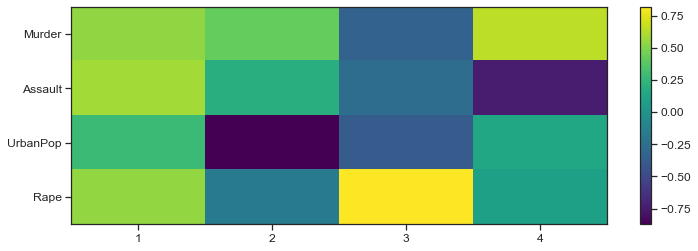

In [39]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos `explained_variance_` y `explained_variance_ratio_` del modelo.

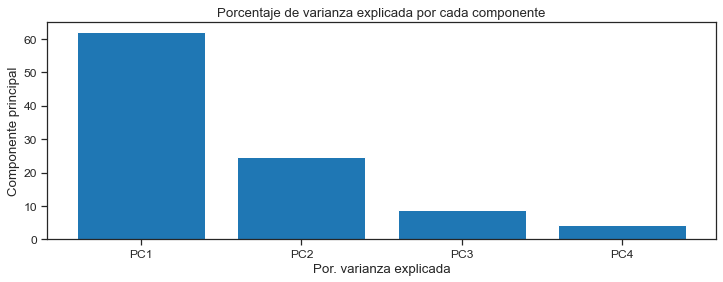

In [40]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

Ahora realizamos el gráfico pero respecto a la suma acumulada. 

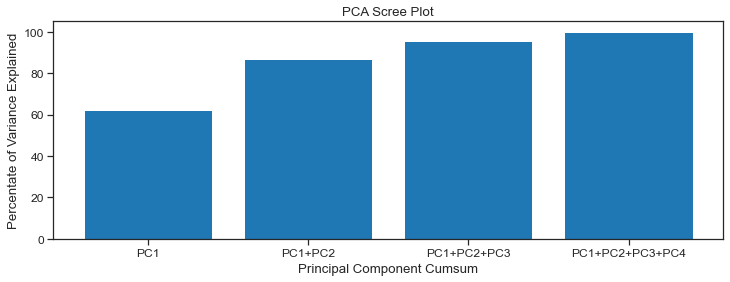

In [41]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada.

**Transformación**

Una vez entrenado el modelo, con el método `transform()` se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [42]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
index,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [43]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4
index,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


**Reconstrucción**


Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [14]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = datos.columns,
                    index   = datos.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(datos.head())

------------------
Valores originales
------------------


,Murder,Assault,UrbanPop,Rape
index,,,,
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6


---------------------
Valores reconstruidos
---------------------


,Murder,Assault,UrbanPop,Rape
index,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## t-Distributed Stochastic Neighbor Embedding (t-SNE) 

t-Distributed Stochastic Neighbor Embedding (t-SNE)  es una técnica no lineal no supervisada utilizada principalmente para la exploración de datos y la visualización de datos de alta dimensión.

En términos más simples, tSNE le da una sensación o intuición de cómo se organizan los datos en un espacio de alta dimensión. Fue desarrollado por Laurens van der Maatens y Geoffrey Hinton en 2008.

### Comparando con PCA
Si está familiarizado con Análisis de componentes principales (PCA), entonces como yo , probablemente se esté preguntando la diferencia entre PCA y tSNE.

Lo primero a tener en cuenta es que PCA se desarrolló en 1933, mientras que tSNE se desarrolló en 2008. Mucho ha cambiado en el mundo de la ciencia de datos desde 1933, principalmente en el ámbito del cálculo y el tamaño de los datos.

En segundo lugar, PCA es una técnica de reducción de dimensión lineal que busca maximizar la varianza y preserva las distancias pares grandes. En otras palabras, las cosas que son diferentes terminan muy separadas. Esto puede conducir a una visualización deficiente, especialmente cuando se trata de estructuras distribuidoras no lineales. Piense en una estructura múltiple como cualquier forma geométrica como: cilindro, bola, curva, etc.

tSNE difiere de PCA al preservar solo pequeñas distancias por pares o similitudes locales, mientras que PCA se preocupa por preservar distancias pares grandes para maximizar la varianza.

Laurens ilustra bastante bien el enfoque PCA y tSNE utilizando el conjunto de datos Swiss Roll en la Figura 1 [1].

Puede ver que debido a la no linealidad de este conjunto de datos de juguete (múltiple) y la preservación de grandes distancias, PCA conservaría incorrectamente la estructura de los datos.

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/images/tsne_01.png" align="center"/>

> Figura 1 – Dataset de rollo suizo. Conservar la distancia pequeña con tSNE (línea continua) frente a la maximización de la variación PCA [1]

### Explicación

Ahora que sabemos por qué podríamos usar tSNE sobre PCA, analicemos cómo funciona tSNE. El algoritmo tSNE calcula una medida de similitud entre pares de instancias en el espacio de alta dimensión y en el espacio de baja dimensión. Luego trata de optimizar estas dos medidas de similitud usando una función de costo. Vamos a dividirlo en 3 pasos básicos.

1. Paso 1, mide similitudes entre puntos en el espacio de alta dimensión. Piense en un conjunto de puntos de datos dispersos en un espacio 2D (Figura 2).

Para cada punto de datos (xi) centraremos una distribución Gaussiana sobre ese punto. Luego medimos la densidad de todos los puntos (xj) bajo esa distribución Gaussiana. Luego renormalize para todos los puntos.

Esto nos da un conjunto de probabilidades (Pij) para todos los puntos. Esas probabilidades son proporcionales a las similitudes.

Todo lo que eso significa es que si los puntos de datos x1 y x2 tienen valores iguales bajo este círculo gaussiano, entonces sus proporciones y similitudes son iguales y, por lo tanto, tienes similitudes locales en la estructura de este espacio de alta dimensión.

La distribución gaussiana o el círculo se pueden manipular usando lo que se llama perplejidad, que influye en la varianza de la distribución (tamaño del círculo) y esencialmente en el número de vecinos más cercanos. El rango normal para la perplejidad está entre 5 y 50 [2].

<img src="images/tsne_02.png" align="center"/>

> Figura 2 – Medición de similitudes por pares en el espacio de alta dimensión



Figura 2 – Medición de similitudes por pares en el espacio de alta dimensión
2. El paso 2 es similar al paso 1, pero en lugar de usar una distribución gaussiana se usa una distribución t de Student con un grado de libertad, que también se conoce como la distribución de Cauchy (Figura 3). Esto nos da un segundo conjunto de probabilidades ($Q_{ij}$) en el espacio de baja dimensión.

Como puede ver, la distribución t de Student tiene colas más pesadas que la distribución normal. Las colas pesadas permiten un mejor modelado de distancias muy separadas.

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/images/tsne_03.png" align="center"/>

> Figura 3 – Distribución noraml vs t-student

3. El último paso es que queremos que este conjunto de probabilidades del espacio de baja dimensión ($Q_{ij}$) refleje las del espacio de alta dimensión ($P_{ij}$) de la mejor manera posible.

Queremos que las dos estructuras de mapa sean similares. Medimos la diferencia entre las distribuciones de probabilidad de los espacios bidimensionales utilizando la divergencia de Kullback-Liebler (KL).

No incluiré mucho en KL, excepto que es un enfoque asimétrico que compara de manera eficiente los grandes valores $P_{ij}$ y $Q_{ij}$. Finalmente, utilizamos el descenso de gradiente para minimizar nuestra función de costo KL.

### Aplicación



Laurens van der Maaten menciona el uso de tSNE en áreas como investigación del clima, seguridad informática, bioinformática, investigación del cáncer, etc. tSNE podría usarse en datos de alta dimensión y luego el resultado de esas dimensiones se convierte en insumos para algún otro modelo de clasificación .

Además, tSNE podría usarse para investigar, aprender o evaluar la segmentación. Muchas veces seleccionamos la cantidad de segmentos antes del modelado o iteramos después de los resultados. tSNE a menudo puede mostrar una separación clara en los datos.

Esto se puede usar antes de usar su modelo de segmentación para seleccionar un número de clúster o después para evaluar si sus segmentos realmente se mantienen. tSNE, sin embargo, no es un enfoque de agrupamiento, ya que no conserva las entradas como PCA y los valores a menudo pueden cambiar entre ejecuciones, por lo que es pura exploración.

A continuación se procede a comparar de manera  visual los algoritmos de PCA y tSNE en el conjunto de datos `Digits` .

> **Datos**: El conjunto de datos contiene imágenes de dígitos escritos a mano: 10 clases donde cada clase se refiere a un dígito. Los programas de preprocesamiento puestos a disposición por NIST se utilizaron para extraer mapas de bits normalizados de dígitos escritos a mano de un formulario preimpreso. De un total de 43 personas, 30 contribuyeron al conjunto de entrenamiento y diferentes 13 al conjunto de prueba. Los mapas de bits de 32x32 se dividen en bloques no superpuestos de 4x4 y se cuenta el número de píxeles en cada bloque. Esto genera una matriz de entrada de 8x8 donde cada elemento es un número entero en el rango 0..16. Esto reduce la dimensionalidad y da invariancia a pequeñas distorsiones.

In [44]:
# Load Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [45]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [46]:
digits = load_digits()

df = pd.DataFrame(digits['data'])
df['label'] = digits['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [47]:
# PCA
scaler = StandardScaler()

X = df.drop(columns='label')
y = df['label']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['label'] = y

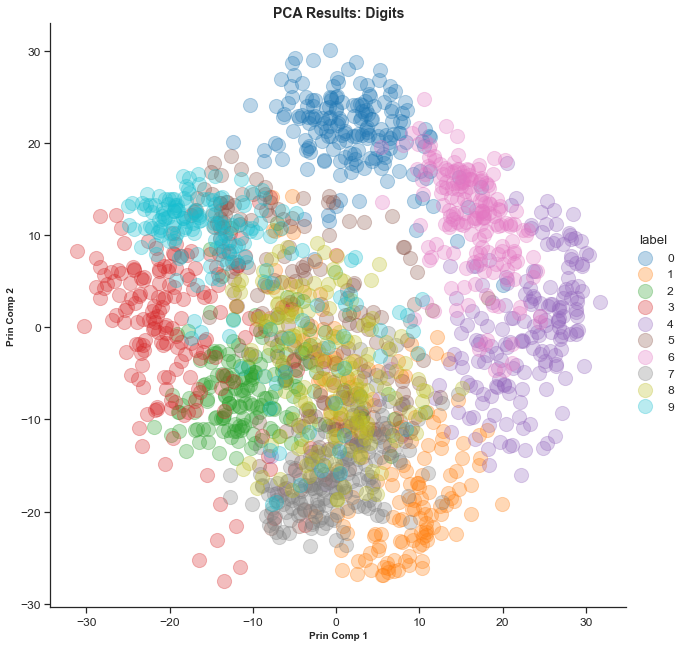

In [48]:
# Plot Digits PCA


# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

Al graficar las dos componentes principales del método PCA, se observa que no existe una clara distinción entre la distintas clases (solo se ve un gran cúmulo de puntos mezclados). 

In [20]:
# tsne
scaler = StandardScaler()

X = df.drop(columns='label')
y = df['label']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = y

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


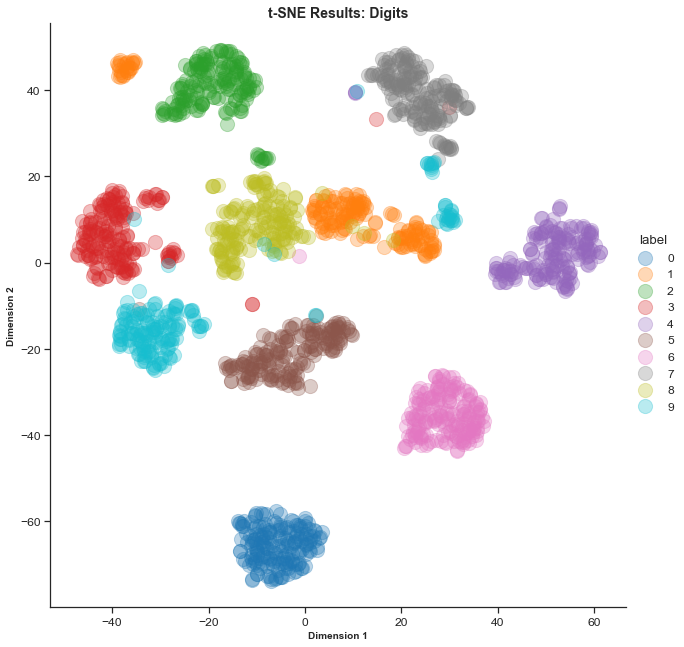

In [21]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Para el caso del método TSNE, se observa una diferenciación entre los grupos de estudios (aspecto que fue muy distinto al momento de analizar el método del PCA).

> **Observación**: Si bien se muestra donde el método TSNE logra ser superior en aspecto de reducción de dimensionalidad que el método PCA, no significa que para distintos experimientos se tengan los mismo resultados.

## Otros métodos de reducción de dimensionalidad

Existen otro métodos de reducción de dimencionalidad, a continuación se deja una referencia con la descripción de cada uno de estos algoritmos.

* [Descomposición del valor singular ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)
* [Non-Negative Matrix Factorization ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)
* [Isomap Embedding ](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)
* [Locally Linear Embedding ](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html)
* [Multidimensional Scaling ](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)
* [Spectral Embedding ](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html)

### Aplicación

En este ejemplo se quiere aprovechar las bondades de aplicar la reducción de dimensionalidad para ocupar un modelo de clasificación (en este caso, el modelo de regresión logística). Para ello se ocupará el conjunto de datos `meatspec.csv`

> **Datos**: El departamento de calidad de una empresa de alimentación se encarga de medir el contenido en grasa de la carne que comercializa. Este estudio se realiza mediante técnicas de analítica química, un proceso relativamente costoso en tiempo y recursos. Una alternativa que permitiría reducir costes y optimizar tiempo es emplear un espectrofotómetro (instrumento capaz de detectar la absorbancia que tiene un material a diferentes tipos de luz en función de sus características) e inferir el contenido en grasa a partir de sus medidas.

> Antes de dar por válida esta nueva técnica, la empresa necesita comprobar qué margen de error tiene respecto al análisis químico. Para ello, se mide el espectro de absorbancia a 100 longitudes de onda en 215 muestras de carne, cuyo contenido en grasa se obtiene también por análisis químico, y se entrena un modelo con el objetivo de predecir el contenido en grasa a partir de los valores dados por el espectrofotómetro.


In [49]:
# Librerias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn.manifold import Isomap,LocallyLinearEmbedding,MDS,SpectralEmbedding,TSNE

from metrics_regression import summary_metrics

In [50]:
# Datos
datos = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_no_supervisado/data/meatspec.csv')
datos = datos.drop(columns = datos.columns[0])
datos['fat'] = datos['fat'].astype(float)
datos.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,2.62964,2.63245,2.63565,2.63933,2.64353,2.64825,2.65350,2.65937,2.66585,2.67281,2.68008,2.68733,2.69427,2.70073,2.70684,2.71281,2.71914,2.72628,2.73462,2.74416,2.75466,2.76568,2.77679,2.78790,2.79949,2.81225,2.82706,2.84356,2.86106,2.87857,2.89497,2.90924,2.92085,2.93015,2.93846,2.94771,2.96019,2.97831,3.00306,3.03506,3.07428,3.11963,3.16868,3.21771,3.26254,3.29988,3.32847,3.34899,3.36342,3.37379,3.38152,3.38741,3.39164,3.39418,3.39490,3.39366,3.39045,3.38541,3.37869,3.37041,3.36073,3.34979,3.33769,3.32443,3.31013,3.29487,3.27891,3.26232,3.24542,3.22828,3.21080,3.19287,3.17433,3.15503,3.13475,3.11339,3.09116,3.06850,3.04596,3.02393,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,2.88264,2.88898,2.89577,2.90308,2.91097,2.91953,2.92873,2.93863,2.94929,2.96072,2.97272,2.98493,2.99690,3.00833,3.01920,3.02990,3.04101,3.05345,3.06777,3.08416,3.10221,3.12106,3.13983,3.15810,3.17623,3.19519,3.21584,3.23747,3.25889,3.27835,3.29384,3.30362,3.30681,3.30393,3.29700,3.28925,3.28409,3.28505,3.29326,3.30923,3.33267,3.36251,3.39661,3.43188,3.46492,3.49295,3.51458,3.53004,3.54067,3.54797,3.55306,3.55675,3.55921,3.56045,3.56034,3.55876,3.55571,3.55132,3.54585,3.53950,3.53235,3.52442,3.51583,3.50668,3.49700,3.48683,3.47626,3.46552,3.45501,3.44481,3.43477,3.42465,3.41419,3.40303,3.39082,3.37731,3.36265,3.34745,3.33245,3.31818,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,2.60414,2.60714,2.61029,2.61361,2.61714,2.62089,2.62486,2.62909,2.63361,2.63835,2.64330,2.64838,2.65354,2.65870,2.66375,2.66880,2.67383,2.67892,2.68411,2.68937,2.69470,2.70012,2.70563,2.71141,2.71775,2.72490,2.73344,2.74327,2.75433,2.76642,2.77931,2.79272,2.80649,2.82064,2.83541,2.85121,2.86872,2.88905,2.91289,2.94088,2.97325,3.00946,3.04780,3.08554,3.11947,3.14696,3.16677,3.17938,3.18631,3.18924,3.18950,3.18801,3.18498,3.18039,3.17411,3.16611,3.15641,3.14512,3.13241,3.11843,3.10329,3.08714,3.07014,3.05237,3.03393,3.01504,2.99569,2.97612,2.95642,2.93660,2.91667,2.89655,2.87622,2.85563,2.83474,2.81361,2.79235,2.77113,2.75015,2.72956,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,2.84374,2.84664,2.84975,2.85307,2.85661,2.86038,2.86437,2.86860,2.87308,2.87789,2.88301,2.88832,2.89374,2.89917,2.90457,2.90991,2.91521,2.92043,2.92565,2.93082,2.93604,2.94128,2.94658,2.95202,2.95777,2.96419,2.97159,2.98045,2.99090,3.00284,3.01611,3.03048,3.04579,3.06194,3.07889,3.09686,3.11629,3.13775,3.16217,3.19068,3.22376,3.26172,3.30379,3.34793,3.39093,3.42920,3.45998,3.48227,3.49687,3.50558,3.51026,3.51221,3.51215,3.51036,3.50682,3.50140,3.49398,3.48457,3.47333,3.46041,3.44595,3.43005,3.41285,3.39450,3.37511,3.35482,3.33376,3.31204,3.28986,3.26730,3.24442,3.22117,3.19757,3.17357,3.14915,3.12429,3.09908,3.07366,3.04825,3.02308,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,2.81272,2.81704,2.82184,2.82710,2.83294,2.83945,2.84664,2.85458,2.86331,2.87280,2.88291,2.89335,2.90374,2.91371,2.92305,2.93187,2.94060,2.94986,2.96035,2.97241,2.98606,3.00097,3.01652,3.03220,3.04793,3.06413,3.08153,3.10078,3.12185,3.14371,3.16510,3.18470,3.20140,3.21477,3.22544,3.23505,3.24586

El set de datos contiene 101 columnas. Las 100 primeras, nombradas como  $V_1,...,V_{100}$  recogen el valor de absorbancia para cada una de las 100 longitudes de onda analizadas (predictores), y la columna fat el contenido en grasa medido por técnicas químicas (variable respuesta).

Muchas de las variables están altamente correlacionadas (correlación absoluta > 0.8), lo que supone un problema a la hora de emplear modelos de regresión lineal.

In [51]:
# Correlación entre columnas numéricas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
1019,V11,V10,0.999996,0.999996
919,V10,V11,0.999996,0.999996
1021,V11,V12,0.999996,0.999996
1121,V12,V11,0.999996,0.999996
917,V10,V9,0.999996,0.999996


Se procede aplicar el modelo de regresión lineal .

In [52]:
# División de los datos en train y test
X = datos.drop(columns='fat')
y = datos['fat']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [53]:
# Creación y entrenamiento del modelo
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [54]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
df_pred = pd.DataFrame({
    'y':y_test,
    'yhat':predicciones
})

df_summary = summary_metrics(df_pred)
df_summary

,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,2.0904,14.743,3.8397,0.1616,0.1484,0.1088,0.1362,0.1665


Ahora se ocuparan los modelos de reducción de dimensionalidad para entrenar el modelo de regresión lineal. Para ello se ocuparan los distintos algoritmos mencionados. Lo primero es crear una función que pueda realizar esta tarea de manera automática.

In [55]:
# funcion de reduccion de dimensionalidad y aplicacion de la regresion lineal

def dr_pipeline(df, model_dr):
    
    # datos
    X = df.drop(columns='fat')
    y = df['fat']
    
    # reduccion de la dimensionalidad
    embedding = model_dr
    X = embedding.fit_transform(X)
    

    X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
    
    # Creación y entrenamiento del modelo
    modelo = LinearRegression(normalize=True)
    modelo.fit(X = X_train, y = y_train)

    
    # Predicciones test
    predicciones = modelo.predict(X=X_test)
    predicciones = predicciones.flatten()

    # Error de test del modelo 
    df_pred = pd.DataFrame({
        'y':y_test,
        'yhat':predicciones
    })

    df_summary = summary_metrics(df_pred)
    
    return df_summary

**Enfoque: Algebra lineal**

In [56]:
modelos_algebra_lineal = [
    ('PCA',PCA(n_components=5)),
    ('SVD',TruncatedSVD(n_components=5)),
    ('NMF',NMF(n_components=5))
]

names = [x[0] for x in modelos_algebra_lineal]
results = [dr_pipeline(datos,x[1]) for x in modelos_algebra_lineal]

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScale

In [57]:
df_algebra_lineal = pd.concat(results).reset_index(drop=True)
df_algebra_lineal['metodo'] =names
df_algebra_lineal

,mae,mse,rmse,mape,maape,wmape,mmape,smape,metodo
0,2.8050,12.2999,3.5071,0.2869,0.2169,0.1460,0.2183,0.2140,PCA
1,2.6344,11.3195,3.3645,0.2605,0.2023,0.1372,0.1987,0.1979,SVD
2,6.3295,75.1477,8.6688,0.6808,0.3681,0.3295,0.4957,0.3890,NMF


**Enfoque: Manifold Learning**

In [58]:
modelos_manifold= [
    ('Isomap',Isomap(n_components=5)),
    ('LocallyLinearEmbedding', LocallyLinearEmbedding(n_components=5)),
    ('MDS',  MDS(n_components=5)),
    ('SpectralEmbedding', SpectralEmbedding(n_components=5)),
    ('TSNE', TSNE(n_components=2)),
]

names = [x[0] for x in modelos_manifold]
results = [dr_pipeline(datos,x[1]) for x in modelos_manifold]


df_manifold = pd.concat(results).reset_index(drop=True)
df_manifold['metodo'] =names
df_manifold

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScale

,mae,mse,rmse,mape,maape,wmape,mmape,smape,metodo
0,9.4021,133.7433,11.5647,0.9914,0.5142,0.4895,0.7646,0.5491,Isomap
1,9.3007,138.8944,11.7853,0.9351,0.5308,0.4842,0.7296,0.5581,LocallyLinearEmbedding
2,8.3519,120.2493,10.9658,0.7803,0.4784,0.4348,0.6096,0.4979,MDS
3,8.9529,130.9545,11.4435,0.8330,0.5061,0.4661,0.6646,0.5261,SpectralEmbedding
4,9.0524,131.0987,11.4498,0.8761,0.5141,0.4713,0.6872,0.5366,TSNE


In [61]:
df_manifold.sort_values(["mae","mape"])

,mae,mse,rmse,mape,maape,wmape,mmape,smape,metodo
2,8.3519,120.2493,10.9658,0.7803,0.4784,0.4348,0.6096,0.4979,MDS
3,8.9529,130.9545,11.4435,0.8330,0.5061,0.4661,0.6646,0.5261,SpectralEmbedding
4,9.0524,131.0987,11.4498,0.8761,0.5141,0.4713,0.6872,0.5366,TSNE
1,9.3007,138.8944,11.7853,0.9351,0.5308,0.4842,0.7296,0.5581,LocallyLinearEmbedding
0,9.4021,133.7433,11.5647,0.9914,0.5142,0.4895,0.7646,0.5491,Isomap


En este caso en particular, funciona de mejor forma aplicar los métodos de descomposición del **Algebra Lineal** en relación de los métodos de **Manifold Learning**. La enseñanza que se lleva de esto que, dependiendo del volumen de datos que se trabaje, la capidad de cómputo y las habilidades de programación suficiente, se pueden probar y automatizar varios de estos métodos. Por supuesto, quedará como responsabilidad del programador buscar el criterio para poder seleccionar el mejor método (dependiendo del caso en estudio).

## Referencias

1. [In Depth: Principal Component Analysis](https://www.aprendemachinelearning.com/comprende-principal-component-analysis/)
2. [Unsupervised dimensionality reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html)